In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
y = []
lbs= []
ubs = []
 
num_machines = 50
naives = []
heur = []
for G in G_list[:num]:
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, verbose=False)
    _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives.append(naive)
    y.append(obj_opt)
    lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
 

[[0, 1, 2, 3, 4, 5, 6, 81, 91, 92, 93], [16, 17, 18, 19, 7, 82, 94, 95], [32, 33, 34, 35, 8, 83], [48, 49, 50, 51, 9, 84], [64, 65, 66, 67, 10, 85], [11, 86], [12, 87], [13, 88], [14, 89], [15, 90], [20, 21, 22, 80], [23], [24], [25], [26], [27], [28], [29], [30], [31], [36, 37, 38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [52, 53, 54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [68, 69, 70], [71], [72], [73], [74], [75], [76], [77], [78], [79]]
[19.200000000000003, 18.200000000000003, 17.200000000000003, 16.200000000000003, 15.200000000000001, 14.200000000000001, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 19.200000000000003, 18.200000000000003, 17.200000000000003, 16.200000000000003, 15.200000000000001, 14.200000000000001, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 19.200000000000003, 18.200000000000003, 17.200000000000003, 16.200000000000003, 15.200000000000001, 14.200000000000001, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.32, 1.

apm 104.5.118.159_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          208
   Constants    :            0
   Variables    :        18902
   Intermediates:            0
   Connections  :        16120
   Equations    :        10738
   Residuals    :        10738
 
 Number of state variables:          18902
 Number of total equations: -        10945
 Number of slack variables: -         2623
 ---------------------------------------
 Degrees of freedom       :           5334
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 104.5.118.159_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          228
   Constants    :            0
   Variables    :        21227
   Intermediates:            0
   Connections  :        18180
   Equations    :        12023
   Residuals    :        12023
 
 Number of state variables:          21227
 Number of total equations: -        12250
 Number of slack variables: -         2868
 ---------------------------------------
 Degrees of freedom       :           6109
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

-
apm 104.5.118.159_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          338
   Constants    :            0
   Variables    :        34837
   Intermediates:            0
   Connections  :        29510
   Equations    :        19913
   Residuals    :        19913
 
 Number of state variables:          34837
 Number of total equations: -        20250
 Number of slack variables: -         5038
 ---------------------------------------
 Degrees of freedom       :           9549
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

Results
0 Speed: [5.3478967823] Ending Time: [0.18698938802] Interval: [0.0, 0.18699] Task process time: 0.18699
1 Speed: [5.2535702139] Ending Time: [0.37733612496] Interval: [0.18699, 0.37734] Task process time: 0.19035
2 Speed: [5.1575187825] Ending Time: [0.57122779857] Interval: [0.37734, 0.57123] Task process time: 0.19389
3 Speed: [5.0596442553] Ending Time: [0.76887014237] Interval: [0.57123, 0.76887] Task process time: 0.19764
4 Speed: [4.9598387059] Ending Time: [0.97048959205] Interval: [0.76887, 0.97049] Task process time: 0.20162
5 Speed: [4.8579831191] Ending Time: [1.1763363245] Interval: [0.97049, 1.17634] Task process time: 0.20585
6 Speed: [1.0630145695] Ending Time: [2.1170571934] Interval: [1.17634, 2.11706] Task process time: 0.94072
7 Speed: [1.0630145695] Ending Time: [2.1170571934] Interval: [1.17634, 2.11706] Task process time: 0.94072
8 Speed: [1.0630145695] Ending Time: [2.1170571934] Interval: [1.17634, 2.11706] Task process time: 0.94072
9 Speed: [1.0630145

-
apm 104.5.118.159_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          308
   Constants    :            0
   Variables    :        30912
   Intermediates:            0
   Connections  :        26420
   Equations    :        17548
   Residuals    :        17548
 
 Number of state variables:          30912
 Number of total equations: -        17855
 Number of slack variables: -         4233
 ---------------------------------------
 Degrees of freedom       :           8824
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

In [5]:
print("x is \n", x)
print("y is \n", y)
print("lbs are \n",lbs)
print("ubs are \n", ubs)
print("naives are \n",naives)
print("heurs are \m",heur)

x is 
 [96, 156, 176, 286, 256]
y is 
 [400.38657, 671.02754, 780.00378, 10000000, 1168.19317]
lbs are 
 [400.38653, 606.64152, 721.58425, 1098.7852, 1042.02269]
ubs are 
 [678.0954197188692, 1281.6329728730984, 1437.8383666139005, 2903.8785706118383, 2459.8593720435397]
naives are 
 [468.24202016038186, 747.0490836898638, 816.202873617095, 1467.8943938089544, 1256.7390406680113]
heurs are \m [400.3865742226213, 755.9567775257691, 876.8525836737243, 1626.01488607701, 1356.5082806673888]


In [6]:
print(len(y))
print(len(x))

5
5


In [7]:
# naives = [572.8281617409056, 1331.3128540244006, 2051.988186148974, 4908.957570715966, 4427.097315671543, 10722.551392522024, 7706.784325022744, 18780.723094156718, 11887.994968277473, 29080.41842969494, 16967.104097800042, 41618.012251501, 22950.791107151243, 56400.18395313568, 29836.001750405976, 73423.87928867387, 37619.11087992854, 92685.47311048009, 46306.79788927975, 114191.64481211497, 55896.00853253448, 137939.34014765336]
# heurs = [351.14748449053826, 698.6688417479015, 1181.833119651485, 2392.931559303018, 2515.1051913091133, 5128.200522698374, 4320.182955770601, 8876.07384841392, 6602.766119158128, 13562.092685406415, 9411.33279943706, 19356.644767630198, 12670.852536835615, 26103.094518568214, 16404.64052815484, 33831.316526414616, 20688.501817054886, 42685.15172746671, 25668.437288627654, 52905.78716201741, 30587.45634664135, 63200.60308232752]
# y = [300.05921, 586.18851, 10000000, 1637.77108, 1520.32995, 10000000, 2333.07674, 10000000, 3254.04157, 6424.66253, 4271.75539, 10000000, 5377.87606, 10000000, 6565.71298, 12977.19203, 7829.99982, 10000000, 9169.60916, 10000000, 10571.28621, 20904.74224]
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h, true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n, true in zip(naives, y)]
print(ratios3)

[1.1694748283443488, 0.9882166625120288, 0.930832489764098, 0.9027558150777183, 0.9264514331233629]
[1.000000010546361, 1.1265659491796254, 1.1241645311946107, 0.000162601488607701, 1.1612020301979584]
[1.1694748406780524, 1.1132912423979853, 1.0464088694763696, 0.00014678943938089544, 1.0757972850226571]


In [8]:
x = [52, 82, 104, 164, 156, 246, 208, 328, 260, 410, 312, 492, 364, 574, 416, 656, 468, 738, 520, 820, 572, 902]


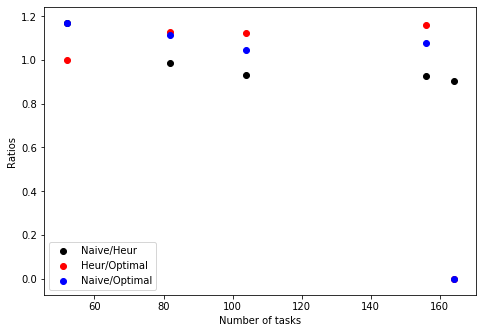

In [9]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x[:num], ratios1, label='Naive/Heur', color='k')
plt.scatter(x[:num], ratios2, label='Heur/Optimal', color='r')
plt.scatter(x[:num], ratios3, label='Naive/Optimal', color='b')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()

In [10]:
import csv
with open("1000genome_naive_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "optimal", "naive", "heuristic", "lowerbound", "upperbound"])
    writer.writerows(zip(x, y, naives, heurs, lbs, ubs))

NameError: name 'heurs' is not defined